In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/일경험 프로젝트/customer_data_.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='cp949')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# 한글 폰트 설정 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 시각화

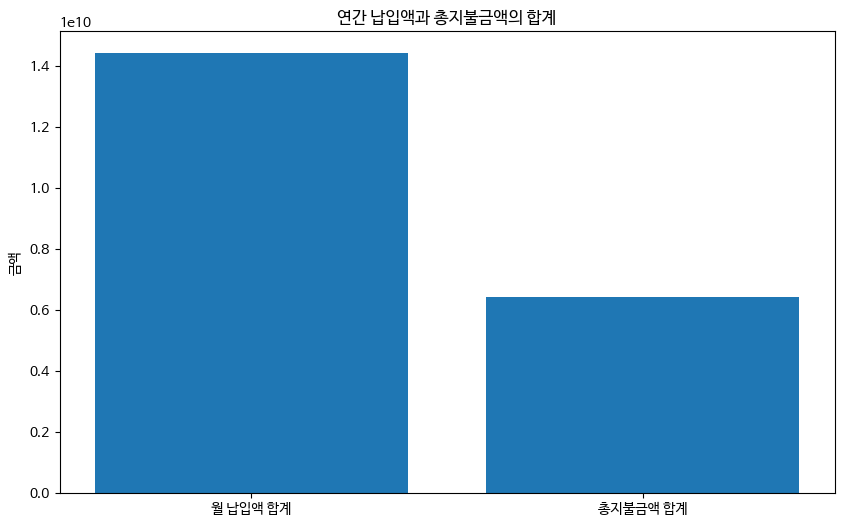

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_payment_sum = df['월 납입액'].sum() * 12
total_payment_sum = df['총지불금액'].sum()

categories = ['월 납입액 합계', '총지불금액 합계']
values = [monthly_payment_sum, total_payment_sum]

plt.figure(figsize=(10,6))
plt.bar(categories, values)
plt.title('연간 납입액과 총지불금액의 합계')
plt.ylabel('금액')
plt.show()

# 연간 고객 보험 납입금 약 144억
# 고객 보험 지급 금액 약 64억

In [ ]:
# 높을 수록 보험사 수익 적어짐
df['총지불/납입'] = df['총지불금액'] / df['월 납입액']

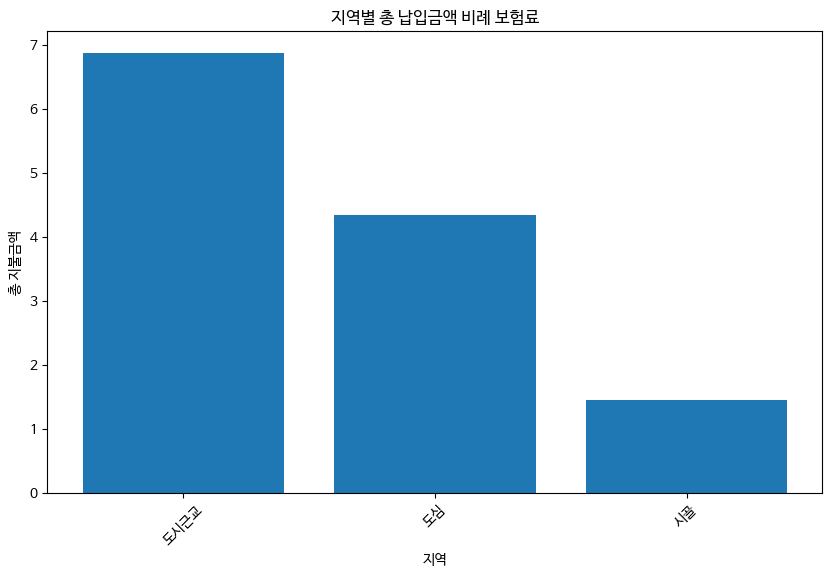

In [ ]:
import matplotlib.pyplot as plt

region_total_payment = df.groupby('지역')['총지불/납입'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(region_total_payment['지역'], region_total_payment['총지불/납입'])
plt.xlabel('지역')
plt.ylabel('총 지불금액')
plt.title('지역별 납입금액 비례 보험료')
plt.xticks(rotation=45)
plt.show()

In [ ]:
li = ['도시근교', '시골', '도심']

for i in li:
    print(i)
    print((df['지역']==i).sum())

도시근교
7572
시골
2344
도심
2084


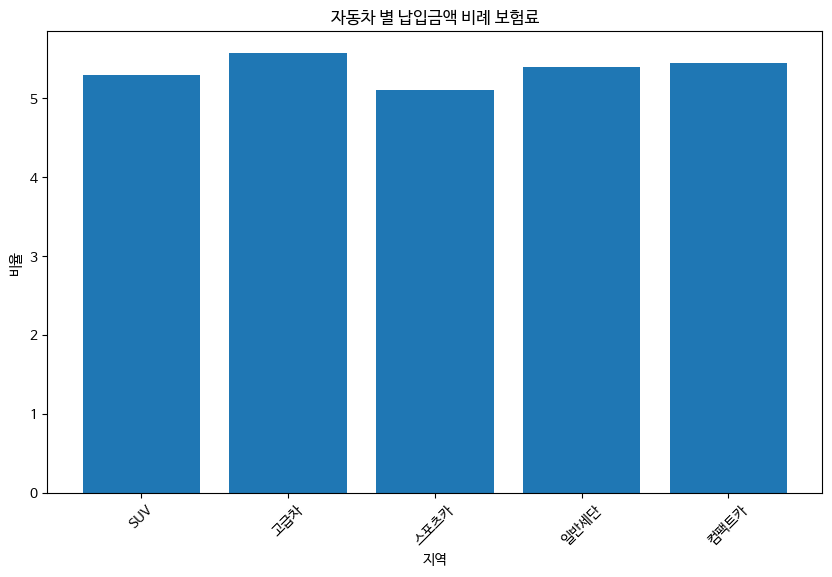

In [ ]:
import matplotlib.pyplot as plt

car_type_total_payment = df.groupby('자동차')['총지불/납입'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(car_type_total_payment['자동차'], car_type_total_payment['총지불/납입'])
plt.xlabel('지역')
plt.ylabel('비율')
plt.title('자동차 납입금액 비례 보험료')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('SUV:', len(df[df['자동차'] == 'SUV']))
print('고급차:', len(df[df['자동차'] == '고급차']))
print('스포츠카:', len(df[df['자동차'] == '스포츠카']))
print('일반세단:', len(df[df['자동차'] == '일반세단']))
print('컴팩트카:', len(df[df['자동차'] == '컴팩트카']))

SUV: 2336
고급차: 454
스포츠카: 652
일반세단: 6074
컴팩트카: 2484


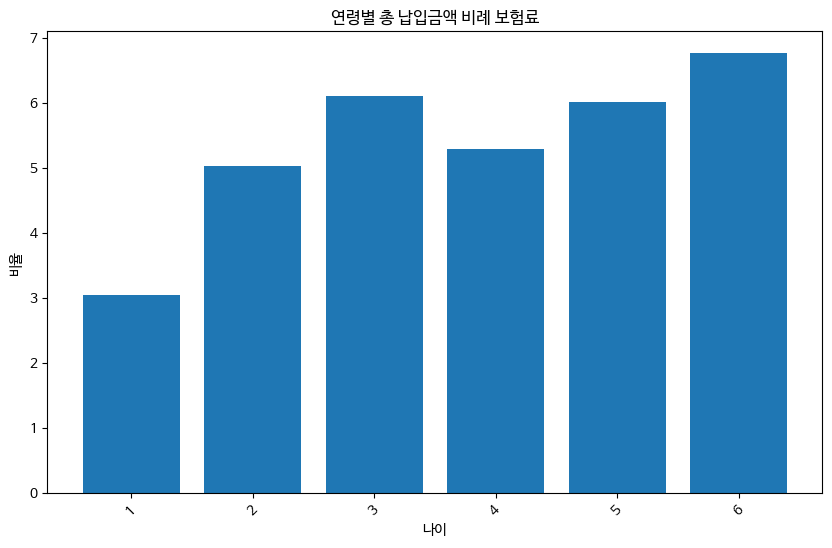

In [ ]:
import matplotlib.pyplot as plt

age_total_payment = df.groupby('AGE')['총지불/납입'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(age_total_payment['AGE'], age_total_payment['총지불/납입'])
plt.xlabel('나이')
plt.ylabel('비율')
plt.title('연령별 납입금액 비례 보험료')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for i in range(1,7):
    print(i, len(df[df['AGE']==i]))

1 1454
2 1538
3 4775
4 3124
5 1057
6 52


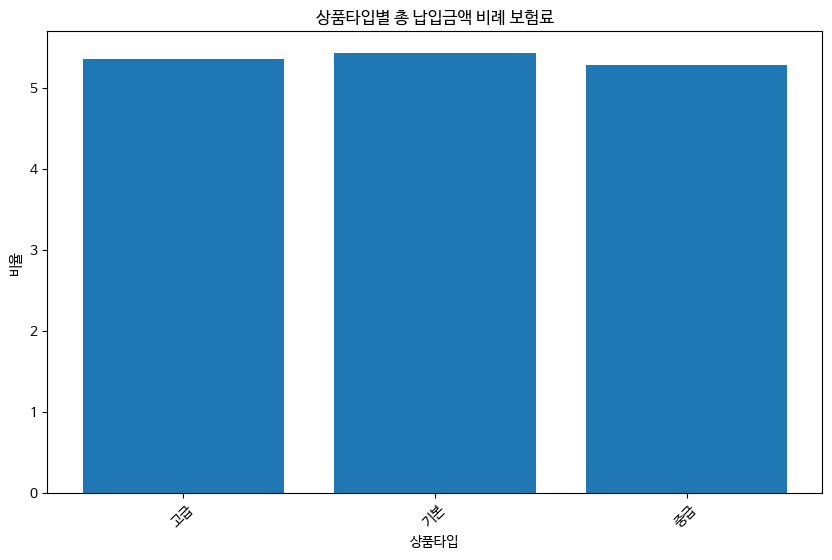

In [ ]:
import matplotlib.pyplot as plt

age_total_payment = df.groupby('상품타입')['총지불/납입'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(age_total_payment['상품타입'], age_total_payment['총지불/납입'])
plt.xlabel('상품타입')
plt.ylabel('비율')
plt.title('상품타입별 납입금액 비례 보험료')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('고급:', len(df[df['상품타입'] == '고급']))
print('중급:', len(df[df['상품타입'] == '중급']))
print('기본:', len(df[df['상품타입'] == '기본']))

고급: 1075
중급: 3647
기본: 7278


### 클러스터링

In [ ]:
pip install kmodes

In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['자동차', '지역', '상품타입', 'AGE', '총지불/납입']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=4, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 1, 2, 3])

df['cluster'] = clusters
print(df.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3493, ncost: 36670.93795926353
Run: 1, iteration: 2/100, moves: 1309, ncost: 35347.19894777505
Run: 1, iteration: 3/100, moves: 423, ncost: 35315.3425346261
Run: 1, iteration: 4/100, moves: 65, ncost: 35313.41768778059
Run: 1, iteration: 5/100, moves: 9, ncost: 35313.363659965624
Run: 1, iteration: 6/100, moves: 0, ncost: 35313.363659965624
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3268, ncost: 38537.226396463855
Run: 2, iteration: 2/100, moves: 1513, ncost: 36945.966677727745
Run: 2, iteration: 3/100, moves: 683, ncost: 35831.90889551904
Run: 2, iteration: 4/100, moves: 1348, ncost: 34970.14367393337
Run: 2, iteration: 5/100, moves: 715, ncost: 34455.978502866245
Run: 2, iteration: 6/100, moves: 349, ncost: 34324.94803388216
Run:

In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)

# 2군집 지급한 보험료가 월 납입금에 12배

cluster
2    12.113666
0     8.049391
1     5.430557
3     1.751371
Name: 총지불/납입, dtype: float64


In [ ]:
납입 보험금에 비해 지급 보험금이 많은 군집 추출



In [ ]:
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['자동차'].value_counts())
print(cluster_2['지역'].value_counts())
print(cluster_2['상품타입'].value_counts())
print(cluster_2['AGE'].value_counts())

# 일반세단, 도시근교, 기본, 40대에서 낮은 총 지불 / 납입

일반세단    273
SUV      96
컴팩트카     95
고급차      27
스포츠카     24
Name: 자동차, dtype: int64
도시근교    515
Name: 지역, dtype: int64
기본    330
중급    141
고급     44
Name: 상품타입, dtype: int64
3    404
4     76
5     28
6      5
2      2
Name: AGE, dtype: int64


In [ ]:
cluster_3 = df[df['cluster'] == 3]
print(cluster_3['자동차'].value_counts())
print(cluster_3['지역'].value_counts())
print(cluster_3['상품타입'].value_counts())
print(cluster_3['AGE'].value_counts())

# 일반세단, 시골, 기본, 40대에서 높은 총 지불 / 납입

일반세단    1483
컴팩트카     593
SUV      501
스포츠카     165
고급차       72
Name: 자동차, dtype: int64
시골    2344
도심     470
Name: 지역, dtype: int64
기본    1730
중급     856
고급     228
Name: 상품타입, dtype: int64
3    1031
1     914
4     553
2     289
5      27
Name: AGE, dtype: int64


### 보험 유지 기대 확률

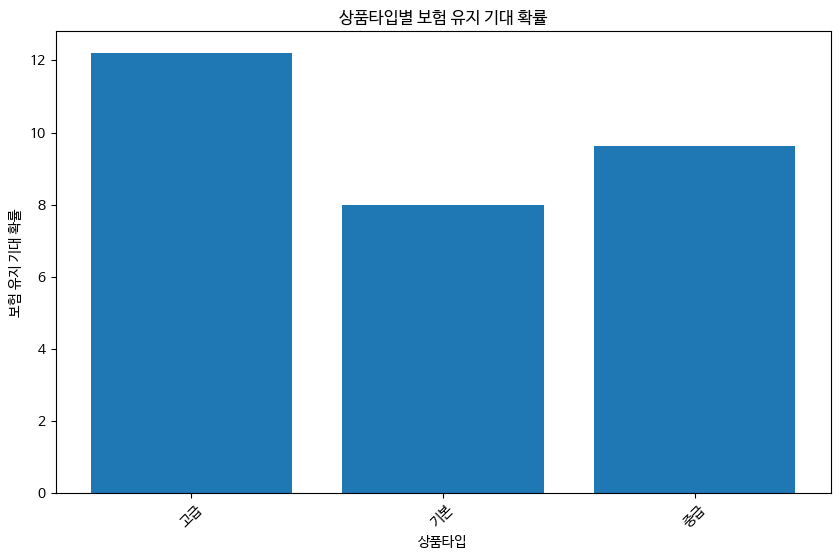

In [ ]:
import matplotlib.pyplot as plt

age_total_payment = df.groupby('상품타입')['Willingness to pay/Stay'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(age_total_payment['상품타입'], age_total_payment['Willingness to pay/Stay'])
plt.xlabel('상품타입')
plt.ylabel('보험 유지 기대 확률')
plt.title('상품타입별 보험 유지 기대 확률')
plt.xticks(rotation=45)
plt.show()

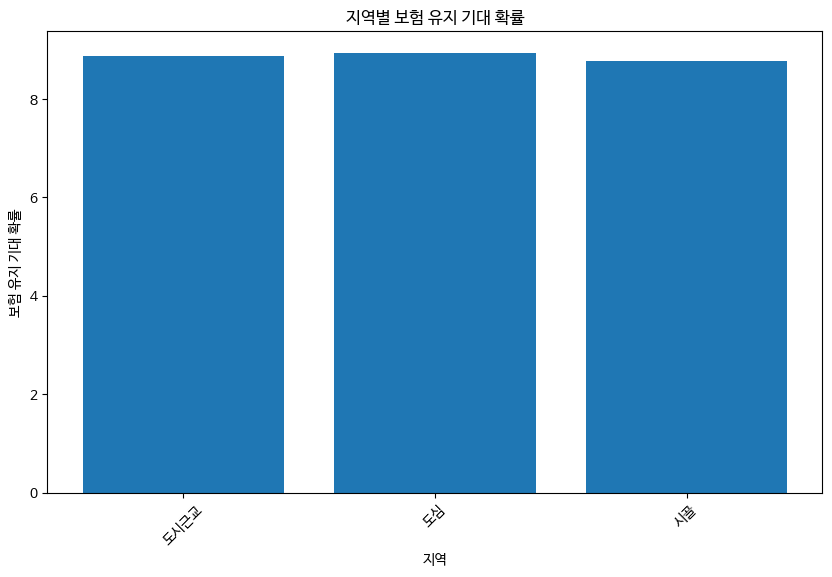

In [ ]:
import matplotlib.pyplot as plt

age_total_payment = df.groupby('지역')['Willingness to pay/Stay'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(age_total_payment['지역'], age_total_payment['Willingness to pay/Stay'])
plt.xlabel('지역')
plt.ylabel('보험 유지 기대 확률')
plt.title('지역별 보험 유지 기대 확률')
plt.xticks(rotation=45)
plt.show()

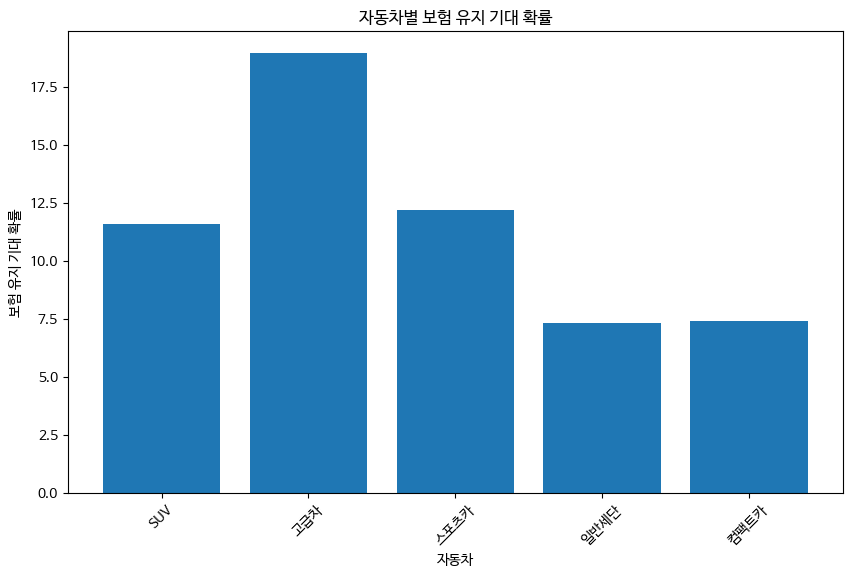

In [ ]:
import matplotlib.pyplot as plt

age_total_payment = df.groupby('자동차')['Willingness to pay/Stay'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(age_total_payment['자동차'], age_total_payment['Willingness to pay/Stay'])
plt.xlabel('자동차')
plt.ylabel('보험 유지 기대 확률')
plt.title('자동차별 보험 유지 기대 확률')
plt.xticks(rotation=45)
plt.show()

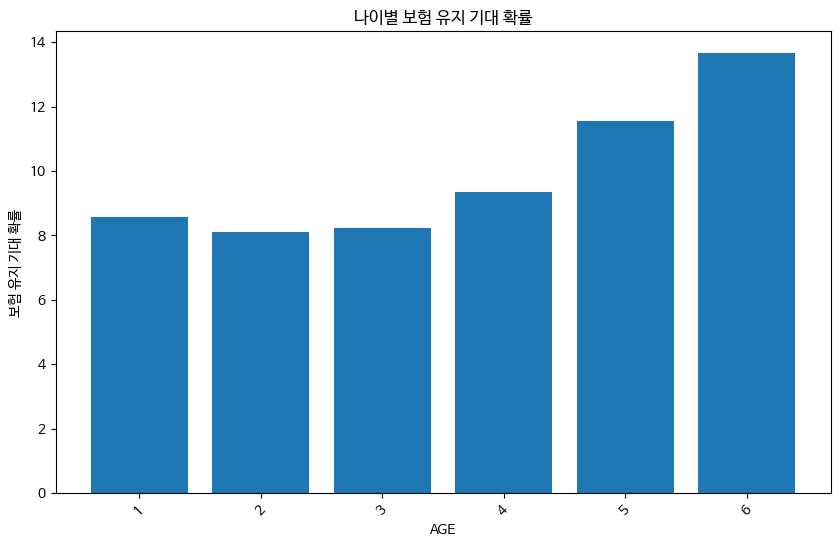

In [ ]:
import matplotlib.pyplot as plt

age_total_payment = df.groupby('AGE')['Willingness to pay/Stay'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(age_total_payment['AGE'], age_total_payment['Willingness to pay/Stay'])
plt.xlabel('AGE')
plt.ylabel('보험 유지 기대 확률')
plt.title('나이별 보험 유지 기대 확률')
plt.xticks(rotation=45)
plt.show()

### 상위 계약과 하위 계약의 연간 수익

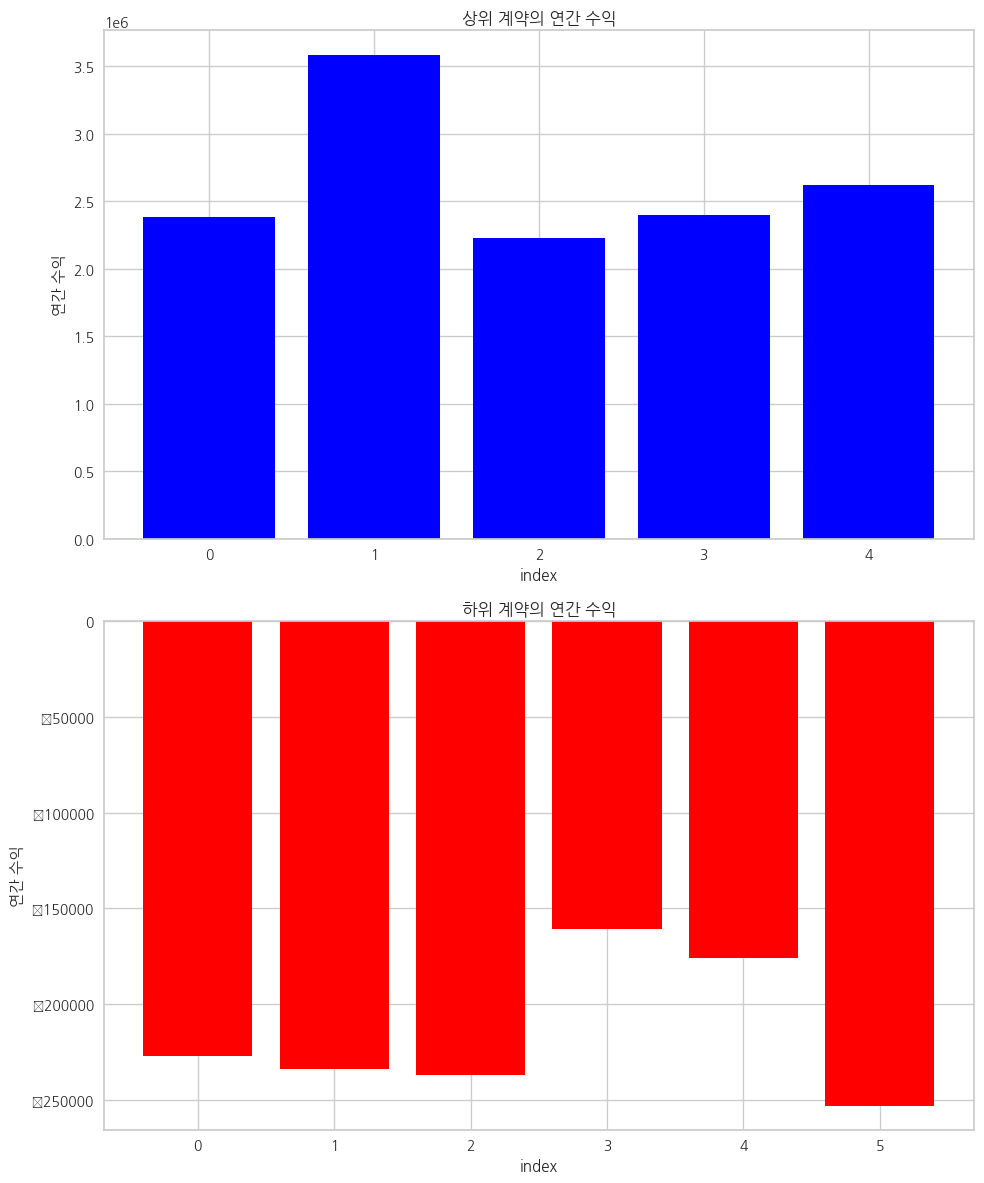

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['연간 수익'] = (df['월 납입액'] * 12) - df['총지불금액']

sorted_df = df.sort_values(by='연간 수익', ascending=False)

top_100 = sorted_df.head(100)
bottom_100 = sorted_df.tail(100)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].bar(top_100['clust'], top_100['연간 수익'], color='blue')
axs[0].set_title('상위 계약의 연간 수익')
axs[0].set_xlabel('index')
axs[0].set_ylabel('연간 수익')
axs[0].grid(True)

axs[1].bar(bottom_100['clust'], bottom_100['연간 수익'], color='red')
axs[1].set_title('하위 계약의 연간 수익')
axs[1].set_xlabel('index')
axs[1].set_ylabel('연간 수익')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df['비율'] = df['총지불금액'] / df['월 납입액'] * 12

In [ ]:
len(df[df['비율'] > 78])

3084

In [ ]:
(df['연간 수익'][df['연간 수익'] >= 0]).sum()

8008864000

In [ ]:
(df['연간 수익'][df['연간 수익'] <= 0]).sum()

# - 약 2600만원의 손해

-26409000

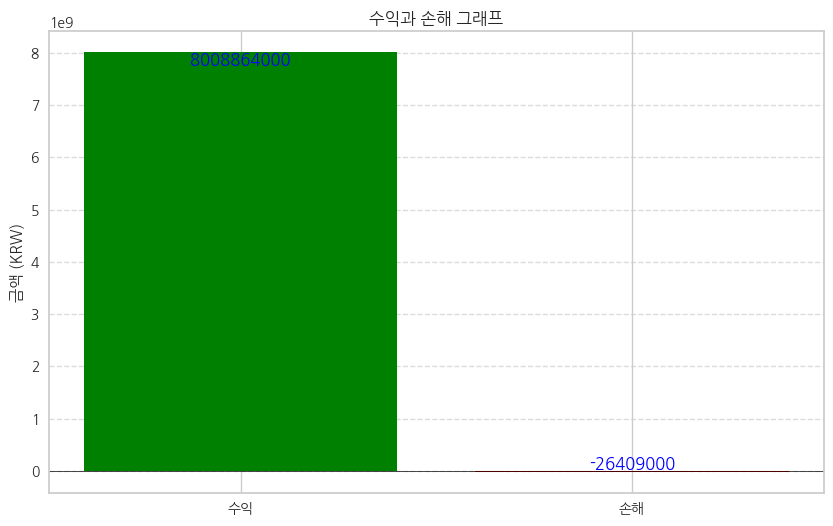

In [ ]:
import matplotlib.pyplot as plt

years = ['수익', '손해']
values = [8008864000, -26409000]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, values, color=['green' if value >= 0 else 'red' for value in values])
plt.axhline(0, color='black', linewidth=0.5)  # Draw a horizontal line at y=0
plt.title('수익과 손해 그래프')
plt.ylabel('금액 (KRW)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the data labels
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.0f}', ha='center', va='bottom' if value < 0 else 'top', color='blue')

plt.show()


In [ ]:
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,연간 수익,비율
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소,329000,94.650000
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,906000,8.100000
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중,358000,72.400000
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,56000,137.890909
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중,493000,94.700000


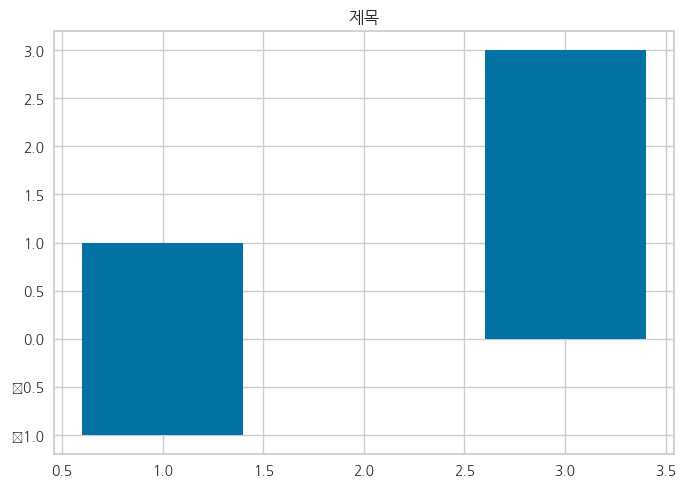

In [ ]:
import matplotlib.pyplot as plt

plt.title('제목')

plt.bar([1, 1,3], [1,-1,3])
plt.show()

### 실제 사례

동양생명에서 AI컨텍센터 설립 후 상담원 인력 40~50% 감축

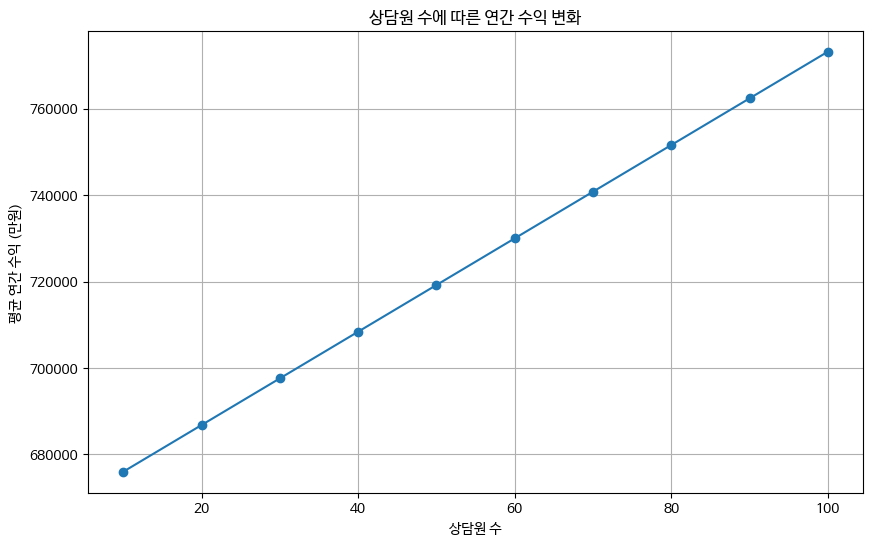

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 상담원 월급은 300만원으로 예상
monthly_salary_per_agent = 300

# 상담원 수에 따른 새로운 연간 수익 계산
new_annual_profit = []
agent_counts = list(range(10, 101, 10))  # 10명에서 100명까지 10명씩 증가

for num_agents in agent_counts:
    monthly_salary_total = num_agents * monthly_salary_per_agent
    reduced_num_agents = num_agents * (1 - 0.3) # 약 30퍼 인력 감축
    reduced_monthly_salary_total = reduced_num_agents * monthly_salary_per_agent
    total_salary_savings = (monthly_salary_total - reduced_monthly_salary_total) * 12
    new_annual_profit_per_contract = (df['월 납입액'] * 12) - df['총지불금액'] + total_salary_savings
    new_annual_profit.append(new_annual_profit_per_contract.mean())

plt.figure(figsize=(10, 6))
plt.plot(agent_counts, new_annual_profit, marker='o')
plt.title('상담원 수에 따른 연간 수익 변화')
plt.xlabel('상담원 수')
plt.ylabel('평균 연간 수익 (만원)')
plt.grid(True)
plt.show()

In [ ]:
700000000
약 7억

### 머신러닝

In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/일경험 프로젝트/customer_data_.csv'

# CSV 파일 불러오기
df_m = pd.read_csv(file_path, encoding='cp949')

In [ ]:
df_m.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [ ]:
pip install pycaret

In [ ]:
pip install --upgrade pycaret

In [ ]:
import pandas as pd
from pycaret.regression import *



# 카테고리형 변수 설정
cat_features = ['AGE', '고용상태', '성별', '갱신', '상품타입', '교육수준', '지역', '결혼여부', '자동차', '판매채널', '거주지사이즈']

# 데이터 프레임의 카테고리형 변수를 'category' 타입으로 변환
for feature in cat_features:
    df_m[feature] = df_m[feature].astype('category')

# pycaret 설정 초기화
reg1 = setup(data = df_m,
             target = '총지불금액',
             numeric_imputation = 'mean',
             categorical_features = cat_features
             )

# 모델 비교
compare_models()


,Description,Value
0,Session id,4424
1,Target,총지불금액
2,Target type,Regression
3,Original data shape,"(12000, 21)"
4,Transformed data shape,"(12000, 45)"
5,Transformed train set shape,"(8400, 45)"
6,Transformed test set shape,"(3600, 45)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,11


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,83146.2752,17990768916.1123,133892.0877,0.8628,0.4694,0.5327,1.7400
dummy,Dummy Regressor,257328.6709,131438085312.9462,362272.8060,-0.0004,0.9675,2.6562,0.2830


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=4424)

In [ ]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,85066.4850,18057715160.4863,134378.9982,0.8668,0.4648,0.5739
1,81814.9704,16626826752.6626,128945.0532,0.8672,0.5915,0.4477
2,81717.3091,17259327024.0287,131374.7579,0.8585,0.3677,0.3200
3,86408.7843,19098463684.8908,138197.1913,0.8456,0.4257,0.4796
4,79767.0076,16278119171.7169,127585.7326,0.8709,0.4407,0.4710
5,78933.9193,15552652837.0867,124710.2756,0.8747,0.4789,0.7051
6,84693.8751,19016184170.7052,137899.1812,0.8453,0.5221,0.7193
7,83525.8998,16419112059.1439,128137.0831,0.8907,0.5100,0.6183
8,84124.9104,17811439567.0333,133459.5053,0.8668,0.4106,0.4342


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# 변수 중요도 버전문제;
plot_model(lightgbm_model, plot='feature')

In [ ]:
pip show pycaret

Name: pycaret
Version: 3.1.0
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [ ]:
pip show scipy

In [ ]:
pip install scipy==1.10.1

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

<Figure size 1000x2000 with 0 Axes>

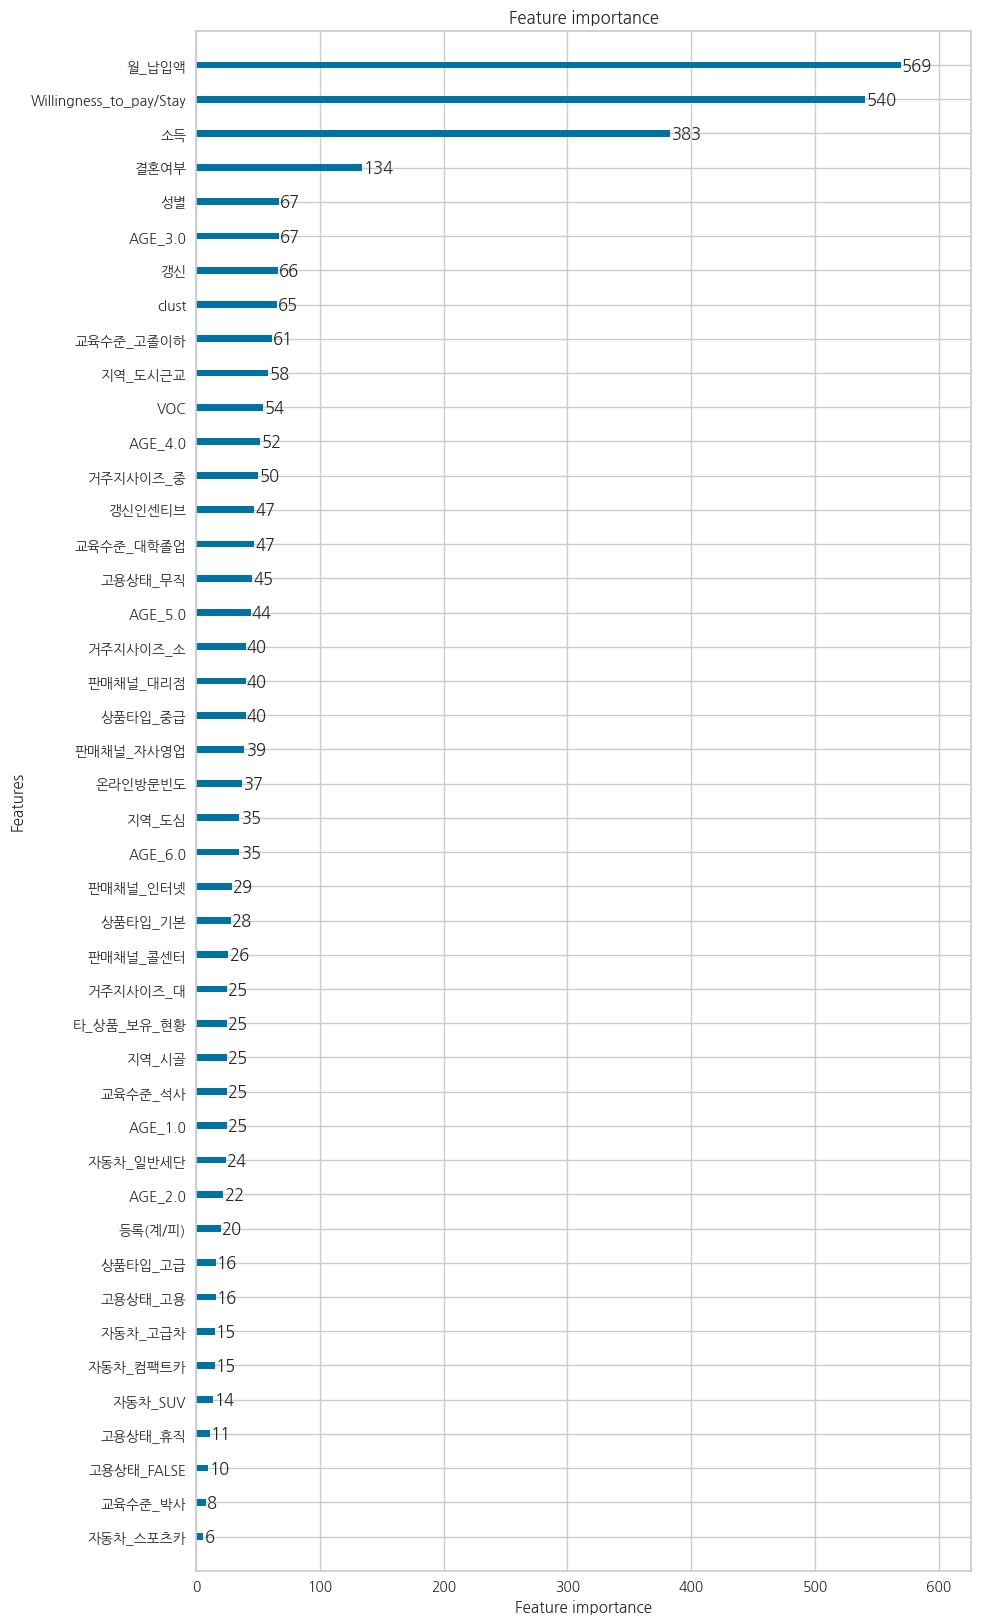

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
lgb.plot_importance(lightgbm_model, figsize=(10,20))
plt.show()

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [ ]:
df_m.drop(columns=['clust', '등록(계/피)'], inplace=True)

In [ ]:
df_m.head()

,AGE,고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,3,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,1,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,2,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,5,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,4,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [ ]:
import pandas as pd
from pycaret.regression import *

# 원핫 인코딩 한 경우

# 카테고리형 변수 설정
cat_features = ['AGE', '온라인방문빈도', '고용상태', '성별', '갱신', '상품타입', '교육수준', '지역', '결혼여부', '자동차', '판매채널', '거주지사이즈', '타 상품 보유 현황', '갱신인센티브']

# 데이터 프레임의 카테고리형 변수를 'category' 타입으로 변환
for feature in cat_features:
    df_m[feature] = df_m[feature].astype('category')

# pycaret 설정 초기화
reg1 = setup(data = df_m,
             target = '총지불금액',
             numeric_imputation = 'mean',
             categorical_features = cat_features
             )

# 모델 비교
compare_models()


,Description,Value
0,Session id,892
1,Target,총지불금액
2,Target type,Regression
3,Original data shape,"(12000, 19)"
4,Transformed data shape,"(12000, 51)"
5,Transformed train set shape,"(8400, 51)"
6,Transformed test set shape,"(3600, 51)"
7,Ordinal features,3
8,Numeric features,4
9,Categorical features,14


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,74190.8845,16195529224.8214,126816.9957,0.8721,0.4608,0.4792,5.7790
lightgbm,Light Gradient Boosting Machine,82786.9412,17009917126.1439,130141.2160,0.8656,0.4917,0.5701,1.0610
xgboost,Extreme Gradient Boosting,80224.7176,17193188217.8463,130779.0522,0.8643,0.4813,0.5226,0.8940
et,Extra Trees Regressor,67199.3857,17628763056.0238,132475.8142,0.8605,0.4297,0.3811,5.4200
gbr,Gradient Boosting Regressor,91889.0841,19787573391.8621,140348.0655,0.8436,0.5051,0.6150,1.9300
lr,Linear Regression,118087.0582,29644475185.2879,171849.1837,0.7662,0.7372,0.6691,1.1830
lasso,Lasso Regression,118087.4621,29644390798.0699,171848.9215,0.7662,0.7371,0.6692,0.8040
ridge,Ridge Regression,118083.1004,29643611375.3378,171846.3439,0.7662,0.7364,0.6695,0.9310
llar,Lasso Least Angle Regression,118091.9851,29641318927.7489,171839.8940,0.7662,0.7372,0.6699,0.7270
dt,Decision Tree Regressor,88297.5000,31066987976.1905,175878.7836,0.7538,0.5952,0.5110,0.7820


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=892)

In [ ]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,81795.9793,17858663368.8622,133636.3101,0.8587,0.4289,0.4146
1,80340.0147,15179139434.7122,123203.6502,0.8663,0.5758,0.4837
2,88277.6183,21261540139.7596,145813.3744,0.8489,0.4607,0.6338
3,87945.9958,18392898877.6352,135620.4221,0.8409,0.4080,0.3828
4,82996.1219,16477471473.3065,128364.6037,0.8669,0.4438,0.5830
5,83147.2805,16889503636.0218,129959.6231,0.8682,0.4669,0.6205
6,79208.7198,15156092357.2555,123110.0823,0.8852,0.6438,0.6039
7,88511.4695,19812919388.9989,140758.3724,0.8575,0.5537,0.7317
8,79346.7050,15659454341.5827,125137.7415,0.8843,0.4862,0.7729


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
lgb.plot_importance(lightgbm_model, figsize=(10,20))
plt.show()

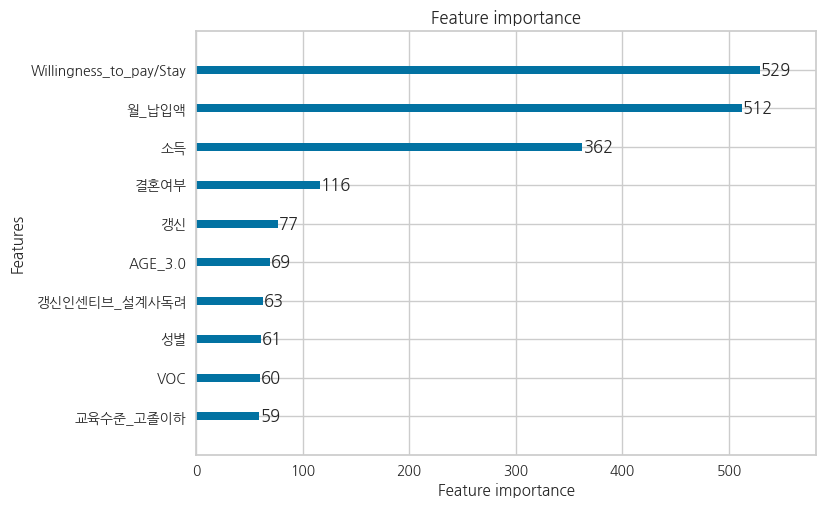

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,20))
lgb.plot_importance(lightgbm_model, max_num_features=10)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [ ]:
df['VOC'].unique()

array([0, 1, 3, 2, 4, 5])

In [ ]:
# 다중공선성 확인

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_1 = df['Willingness to pay/Stay', '월 납입액']

features = df.columns

vif_data = pd.DataFrame()
vif_data["feature"] = features
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(features))]

print(vif_data)

TypeError: ignored

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_features = ['총지불금액', 'Willingness to pay/Stay', '월 납입액', 'VOC']
selected_df = df[selected_features]

vif_data = pd.DataFrame()
vif_data["feature"] = selected_features
vif_data["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(len(selected_features))]

print(vif_data)


                   feature       VIF
0                    총지불금액  5.389888
1  Willingness to pay/Stay  2.724526
2                    월 납입액  7.471206
3                      VOC  1.142481


In [ ]:
# pycaret의 설정에서 전처리된 데이터셋 가져오기
preprocessed_data = get_config('X_train')

# 전처리된 데이터셋 출력
print(preprocessed_data.head())


      clust  AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준  \
9438      2    3    피보험자   무직   1                15.595500   0   기본    석사   
4684      3    1     계약자   고용   0                 9.568200   0   기본    석사   
3548      3    3     계약자   고용   0                10.966800   0   중급    석사   
9925      0    3    피보험자   고용   0                11.011200   0   기본  대학졸업   
2410      0    3     계약자   고용   1                 2.820954   0   기본  대학졸업   

            소득    지역 결혼여부   월 납입액  VOC 타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널   자동차  \
9438         0  도시근교   기혼   80000    1          2    자주방문    포인트  자사영업  일반세단   
4684  98476000    도심   기혼   70000    0          2     비방문    포인트  자사영업  컴팩트카   
3548  43953000    시골   기혼  140000    1          3     비방문     할인   대리점   SUV   
9925  45167000    시골   미혼   70000    0          2    자주방문     할인  자사영업  컴팩트카   
2410  34492700    시골   기혼   70000    0          1     비방문     없음  자사영업  컴팩트카   

     거주지사이즈  
9438      소  
4684      중  
3548      중  


In [ ]:
#################################################################################################################################################################

In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/일경험 프로젝트/customer_data_.csv'

# CSV 파일 불러오기
df_m = pd.read_csv(file_path, encoding='cp949')

In [ ]:
df_m.drop(columns=['clust', '등록(계/피)'], inplace=True)

In [ ]:
import pandas as pd
from pycaret.regression import *

# pycaret 설정 초기화
reg1 = setup(data = df_m,
             target = '총지불금액',
             numeric_imputation = 'mean',
             categorical_features = cat_features
             )

# 모델 비교
compare_models()


,Description,Value
0,Session id,3627
1,Target,총지불금액
2,Target type,Regression
3,Original data shape,"(12000, 19)"
4,Transformed data shape,"(12000, 51)"
5,Transformed train set shape,"(8400, 51)"
6,Transformed test set shape,"(3600, 51)"
7,Ordinal features,3
8,Numeric features,4
9,Categorical features,14


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,72626.7036,15984327300.5119,126220.5203,0.8750,0.4385,0.4685,5.1920
et,Extra Trees Regressor,64766.2952,16363987848.5000,127718.0765,0.8723,0.4134,0.4023,5.0370
xgboost,Extreme Gradient Boosting,79465.0917,17272959886.1720,131156.6773,0.8654,0.4671,0.5174,0.5750
lightgbm,Light Gradient Boosting Machine,82773.8223,17267494636.7696,131140.2934,0.8653,0.4690,0.5443,1.6020
gbr,Gradient Boosting Regressor,92464.4061,20026983012.6118,141242.1892,0.8438,0.4855,0.6076,1.9110
lr,Linear Regression,117583.7685,29244739526.5413,170760.6071,0.7723,0.7339,0.6768,0.8420
lasso,Lasso Regression,117584.2606,29244716615.5976,170760.5560,0.7723,0.7338,0.6769,0.9590
ridge,Ridge Regression,117583.1656,29243821086.9771,170758.0711,0.7723,0.7302,0.6773,0.3520
llar,Lasso Least Angle Regression,117609.0490,29241032425.7299,170749.8637,0.7723,0.7345,0.6771,0.3640
dt,Decision Tree Regressor,84588.5714,29397117857.1429,171069.1102,0.7706,0.5444,0.4544,0.7030


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=3627)

In [ ]:
rf_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,69327.6786,17493158944.6429,132261.7063,0.8475,0.3844,0.3881
1,70173.7500,12620309044.4048,112340.1489,0.8955,0.4351,0.4124
2,75471.1071,17581725517.7381,132596.0992,0.8682,0.4227,0.4214
3,76009.0714,18071538261.9048,134430.4216,0.8818,0.4142,0.3718
4,73044.7500,15646704469.8810,125086.7878,0.8902,0.3920,0.4482
5,73329.1429,16393524338.3333,128037.1990,0.8642,0.4610,0.7183
6,73616.0119,16571239112.7381,128729.3250,0.8749,0.4283,0.4185
7,72962.9643,17310187967.5000,131568.1875,0.8580,0.3685,0.3291
8,72708.2381,15048918549.7619,122674.0337,0.8792,0.4523,0.5726


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,79756.2217,18562939422.2737,136245.8786,0.8382,0.4130,0.4494
1,80835.9935,13483069471.9027,116116.6201,0.8883,0.4701,0.5069
2,82506.8432,17260715039.6451,131380.0405,0.8707,0.4342,0.4461
3,88176.0046,21894451133.6348,147967.7368,0.8568,0.4601,0.4877
4,83338.6848,17683275274.2171,132978.4767,0.8759,0.4366,0.6045
5,83934.0618,18160776155.9988,134761.9240,0.8495,0.4751,0.7817
6,82884.4071,17006119121.4330,130407.5118,0.8716,0.4652,0.4828
7,82064.5745,16777286652.4903,129527.1657,0.8624,0.4167,0.3945
8,85189.5958,17612650803.8804,132712.6626,0.8586,0.4795,0.6441


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
lgb.plot_importance(lightgbm_model, figsize=(10,20))
plt.show()

In [ ]:
importances = rf_model.feature_importances_

feature_importances = pd.DataFrame(importances, index = df_m.drop(columns='총지불금액').columns, columns=['Importance'])

feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances_sorted)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
feature_importances_sorted.plot(kind='bar')
plt.title('Feature Importances')
plt.show()


ValueError: ignored

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   성별                       12000 non-null  int64  
 3   Willingness to pay/Stay  12000 non-null  float64
 4   갱신                       12000 non-null  int64  
 5   상품타입                     12000 non-null  object 
 6   교육수준                     12000 non-null  object 
 7   소득                       12000 non-null  int64  
 8   지역                       12000 non-null  object 
 9   결혼여부                     12000 non-null  object 
 10  월 납입액                    12000 non-null  int64  
 11  VOC                      12000 non-null  int64  
 12  타 상품 보유 현황               12000 non-null  object 
 13  온라인방문빈도                  12000 non-null  object 
 14  갱신인센티브                

### 클러스터링

In [ ]:
pip install kmodes

In [ ]:
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,총지불/납입,cluster
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소,7.887500,2
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,0.675000,1
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중,6.033333,0
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,11.490909,2
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중,7.891667,2


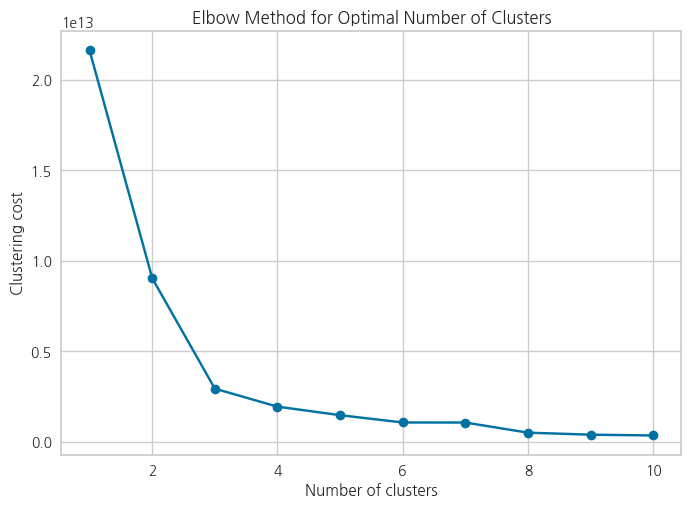

In [ ]:
# Elbow Method로 클러스터 최적값 찾기

import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

selected_data = df[['AGE', 'Willingness to pay/Stay', '결혼여부', '총지불/납입', '성별', '월 납입액']].values

cluster_range = range(1, 11)

cost = []

for n_clusters in cluster_range:
    kproto = KPrototypes(n_clusters=n_clusters, verbose=0)
    kproto.fit_predict(selected_data, categorical=[0, 2, 4])
    cost.append(kproto.cost_)

# 그래프 그리기
plt.plot(cluster_range, cost, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Clustering cost')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['AGE', 'Willingness to pay/Stay', '결혼여부', '총지불/납입', '성별', '월 납입액']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=3, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 2, 4])

df['cluster'] = clusters
print(df.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1184, ncost: 3766806606253.0146
Run: 1, iteration: 2/100, moves: 502, ncost: 2955440227700.666
Run: 1, iteration: 3/100, moves: 44, ncost: 2942944332110.3496
Run: 1, iteration: 4/100, moves: 0, ncost: 2942944332110.3496
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1636, ncost: 3023579121853.6016
Run: 2, iteration: 2/100, moves: 118, ncost: 2942944332110.3496
Run: 2, iteration: 3/100, moves: 0, ncost: 2942944332110.3496
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1846, ncost: 8673896816337.708
Run: 3, iteration: 2/100, moves: 3955, ncost: 7083106050187.811
Run: 3, iteration: 3/100, moves: 2729, ncost: 5206079510685.418
Run: 3, iteration: 4/100, moves: 1633, ncost: 34

In [ ]:
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,총지불/납입,cluster
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소,7.887500,2
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,0.675000,2
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중,6.033333,2
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,11.490909,0
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중,7.891667,3


In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['AGE', 'Willingness to pay/Stay', '결혼여부', '총지불/납입', '성별', '월 납입액', '상품타입', '자동차', '지역']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=4, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 2, 4, 6, 7, 8])

df['cluster'] = clusters
print(df.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2640, ncost: 2042501132572.9226
Run: 1, iteration: 2/100, moves: 93, ncost: 1992384300579.9478
Run: 1, iteration: 3/100, moves: 0, ncost: 1992384300579.9478
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3240, ncost: 4086859252385.765
Run: 2, iteration: 2/100, moves: 1543, ncost: 2319250300632.1836
Run: 2, iteration: 3/100, moves: 328, ncost: 2160529456200.373
Run: 2, iteration: 4/100, moves: 0, ncost: 2160529456200.373
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1357, ncost: 2025830199751.9011
Run: 

In [ ]:
selected_data

array([[3, '무직', 2.616381, ..., 631000, '소', '일반세단'],
       [1, '고용', 6.35253, ..., 54000, '중', '일반세단'],
       [2, '휴직', 4.974354, ..., 362000, '중', '일반세단'],
       ...,
       [3, '무직', 9.0576, ..., 977000, '중', '일반세단'],
       [4, '고용', 8.3472, ..., 854000, '대', '일반세단'],
       [3, '무직', 2.8971, ..., 456000, '중', '컴팩트카']], dtype=object)

In [ ]:
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [ ]:
df.drop(columns=['clust', '등록(계/피)', '성별', '갱신', '지역', '결혼여부', '온라인방문빈도', '갱신인센티브', '판매채널'], inplace=True)

In [ ]:
df.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,VOC,타 상품 보유 현황,총지불금액,자동차,거주지사이즈
0,3,무직,2.616381,기본,대학졸업,0,80000,0,1,631000,일반세단,소
1,1,고용,6.352530,기본,고졸이하,102887400,80000,1,4이상,54000,일반세단,중
2,2,휴직,4.974354,기본,대학졸업,22159500,60000,0,4이상,362000,일반세단,중
3,5,고용,13.480284,고급,고졸이하,51562500,110000,0,2,1264000,컴팩트카,대
4,4,고용,9.776436,기본,석사,26820200,120000,0,3,947000,SUV,중


In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차', 'VOC']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=4, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 1, 3, 4, 7, 9, 10 ])

df['cluster'] = clusters
print(df.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1097, ncost: 8.878141021101e+17
Run: 1, iteration: 2/100, moves: 282, ncost: 8.808274684630865e+17
Run: 1, iteration: 3/100, moves: 63, ncost: 8.803414848623288e+17
Run: 1, iteration: 4/100, moves: 27, ncost: 8.802414642359055e+17
Run: 1, iteration: 5/100, moves: 15, ncost: 8.802089065943265e+17
Run: 1, iteration: 6/100, moves: 4, ncost: 8.802064406969183e+17
Run: 1, iteration: 7/100, moves: 1, ncost: 8.802062570939377e+17
Run: 1, iteration: 8/100, moves: 0, ncost: 8.802062570939377e+17
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2477, ncost: 1.2762821008425508e+18
Run: 2, iteration: 2/100, moves: 1690, ncost: 9.475142335167316e+17
Run: 2, iteration: 3/100, moves: 693, ncost: 8.939161642910164e+17
Run: 2, iteration: 4/100, moves: 28

In [ ]:
print(df['cluster'].value_counts())


3    3632
2    3339
1    2797
0    2232
Name: cluster, dtype: int64


In [ ]:
cluster_2 = df[df['cluster'] == 2]
print('연령:',cluster_2['AGE'].value_counts())
print('총 지불 금액',cluster_2['총지불금액'].sum())
print('30대 총 지불 금액',cluster_2[cluster_2['AGE'] == 2]['총지불금액'].sum())
print('20대 총 지불 금액',cluster_2[cluster_2['AGE'] == 3]['총지불금액'].sum())

연령: 3    2764
2     575
Name: AGE, dtype: int64
총 지불 금액 2429129000
30대 총 지불 금액 175651000
20대 총 지불 금액 2253478000


In [ ]:
cluster_0 = df[df['cluster'] == 0]

print(cluster_0['AGE'].value_counts())
print(cluster_0['고용상태'].value_counts())
print(cluster_0['Willingness to pay/Stay'].mean())
print(cluster_0['상품타입'].value_counts())
print(cluster_0['교육수준'].value_counts())
print(cluster_0['소득'].mean())
print(cluster_0['월 납입액'].mean())
print(cluster_0['타 상품 보유 현황'].value_counts())
print(cluster_0['총지불금액'].mean())
print(cluster_0['거주지사이즈'].value_counts())
print(cluster_0['자동차'].value_counts())

4    1751
3    1591
5     227
2      63
Name: AGE, dtype: int64
고용       2489
휴직        865
FALSE     278
Name: 고용상태, dtype: int64
8.968656757433921
기본    2242
중급    1098
고급     292
Name: 상품타입, dtype: int64
대학졸업    2178
고졸이하     952
석사       344
박사       158
Name: 교육수준, dtype: int64
35246934.91189428
99377.75330396475
1      1319
4이상     943
2       932
3       438
Name: 타 상품 보유 현황, dtype: int64
525289.6475770925
중    2560
소     698
대     374
Name: 거주지사이즈, dtype: int64
일반세단    1849
컴팩트카     742
SUV      697
스포츠카     212
고급차      132
Name: 자동차, dtype: int64


In [ ]:
df.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,자동차,거주지사이즈,cluster
0,3,무직,2.616381,기본,대학졸업,0,80000,1,631000,일반세단,소,2
1,1,고용,6.352530,기본,고졸이하,102887400,80000,4이상,54000,일반세단,중,0
2,2,휴직,4.974354,기본,대학졸업,22159500,60000,4이상,362000,일반세단,중,3
3,5,고용,13.480284,고급,고졸이하,51562500,110000,2,1264000,컴팩트카,대,3
4,4,고용,9.776436,기본,석사,26820200,120000,3,947000,SUV,중,3


In [ ]:
print(cluster_0['소득']==0)

In [ ]:
cluster_1 = df[df['cluster'] == 1]

print(cluster_1['AGE'].value_counts())
print(cluster_1['고용상태'].value_counts())
print('Willingness', cluster_1['Willingness to pay/Stay'].mean())
print(cluster_1['상품타입'].value_counts())
print(cluster_1['교육수준'].value_counts())
print('소득', cluster_1['소득'].mean())
print('월 납입액', cluster_1['월 납입액'].mean())
print(cluster_1['타 상품 보유 현황'].value_counts())
print('총지불금액:', cluster_1['총지불금액'].mean())
print(cluster_1['거주지사이즈'].value_counts())
print(cluster_1['자동차'].value_counts())

1    1368
2     772
4      39
5      29
3      21
6       3
Name: AGE, dtype: int64
고용    2232
Name: 고용상태, dtype: int64
Willingness 8.823392884408602
기본    1427
중급     617
고급     188
Name: 상품타입, dtype: int64
대학졸업    1284
고졸이하     650
석사       204
박사        94
Name: 교육수준, dtype: int64
소득 103193849.05913979
월 납입액 96657.70609318996
1      812
4이상    581
2      523
3      316
Name: 타 상품 보유 현황, dtype: int64
총지불금액: 378670.25089605735
중    1546
소     452
대     234
Name: 거주지사이즈, dtype: int64
일반세단    1132
컴팩트카     518
SUV      422
스포츠카      98
고급차       62
Name: 자동차, dtype: int64


In [ ]:
cluster_3 = df[df['cluster'] == 3]

print(cluster_3['AGE'].value_counts())
print(cluster_3['고용상태'].value_counts())
print(cluster_3['Willingness to pay/Stay'].mean())
print(cluster_3['상품타입'].value_counts())
print(cluster_3['교육수준'].value_counts())
print(cluster_3['소득'].mean())
print(cluster_3['월 납입액'].mean())
print(cluster_3['타 상품 보유 현황'].value_counts())
print(cluster_3['총지불금액'].mean())
print(cluster_3['거주지사이즈'].value_counts())
print(cluster_3['자동차'].value_counts())

3    2764
2     575
Name: AGE, dtype: int64
무직       3028
휴직        229
FALSE      82
Name: 고용상태, dtype: int64
8.409810781671158
기본    1980
중급    1060
고급     299
Name: 상품타입, dtype: int64
대학졸업    1994
고졸이하    1122
석사       145
박사        78
Name: 교육수준, dtype: int64
1434456.99311171
101236.89727463313
1      1152
4이상     930
2       841
3       416
Name: 타 상품 보유 현황, dtype: int64
727501.946690626
중    2290
소     669
대     380
Name: 거주지사이즈, dtype: int64
일반세단    1657
SUV      710
컴팩트카     656
스포츠카     194
고급차      122
Name: 자동차, dtype: int64


In [ ]:
cluster_2 = df[df['cluster'] == 2]

print(cluster_2['AGE'].value_counts())
print(cluster_2['고용상태'].value_counts())
print(cluster_2['Willingness to pay/Stay'].mean())
print(cluster_2['상품타입'].value_counts())
print(cluster_2['교육수준'].value_counts())
print(cluster_2['소득'].mean())
print(cluster_2['월 납입액'].mean())
print(cluster_2['타 상품 보유 현황'].value_counts())
print(cluster_2['총지불금액'].mean())
print(cluster_2['거주지사이즈'].value_counts())
print(cluster_2['자동차'].value_counts())

4    1334
5     801
3     399
2     128
1      86
6      49
Name: AGE, dtype: int64
고용    2797
Name: 고용상태, dtype: int64
9.283303439399356
기본    1629
중급     872
고급     296
Name: 상품타입, dtype: int64
대학졸업    1649
고졸이하     753
석사       286
박사       109
Name: 교육수준, dtype: int64
69314719.91419378
102281.01537361459
1      1000
2       721
4이상     701
3       375
Name: 타 상품 보유 현황, dtype: int64
445066.85734715767
중    2027
소     513
대     257
Name: 거주지사이즈, dtype: int64
일반세단    1436
컴팩트카     568
SUV      507
스포츠카     148
고급차      138
Name: 자동차, dtype: int64


In [ ]:
import pandas as pd
print( 'Cluster_0' )
def format_counts(series):
    return ' '.join([f'{index}: {count}' for index, count in series.items()])

# Create a dictionary to hold the data
data_dict = {
    'Feature': ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액', '거주지사이즈', '자동차', 'VOC'],
    'Value': [
        format_counts(cluster_0['AGE'].value_counts()),
        format_counts(cluster_0['고용상태'].value_counts()),
        cluster_0['Willingness to pay/Stay'].mean(),
        format_counts(cluster_0['상품타입'].value_counts()),
        format_counts(cluster_0['교육수준'].value_counts()),
        cluster_0['소득'].mean(),
        cluster_0['월 납입액'].mean(),
        format_counts(cluster_0['타 상품 보유 현황'].value_counts()),
        cluster_0['총지불금액'].mean(),
        format_counts(cluster_0['거주지사이즈'].value_counts()),
        format_counts(cluster_0['자동차'].value_counts()),
        cluster_0['VOC'].mean(),
    ]
}

summary_df = pd.DataFrame(data_dict)

(summary_df)


Cluster_0


,Feature,Value
0,AGE,4: 1751 3: 1591 5: 227 2: 63
1,고용상태,고용: 2489 휴직: 865 FALSE: 278
2,Willingness to pay/Stay,8.968657
3,상품타입,기본: 2242 중급: 1098 고급: 292
4,교육수준,대학졸업: 2178 고졸이하: 952 석사: 344 박사: 158
5,소득,35246934.911894
6,월 납입액,99377.753304
7,타 상품 보유 현황,1: 1319 4이상: 943 2: 932 3: 438
8,총지불금액,525289.647577
9,거주지사이즈,중: 2560 소: 698 대: 374


In [ ]:
import pandas as pd
print( 'Cluster_1' )
def format_counts(series):
    return ' '.join([f'{index}: {count}' for index, count in series.items()])

# Create a dictionary to hold the data
data_dict = {
    'Feature': ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액', '거주지사이즈', '자동차', 'VOC'],
    'Value': [
        format_counts(cluster_1['AGE'].value_counts()),
        format_counts(cluster_1['고용상태'].value_counts()),
        cluster_1['Willingness to pay/Stay'].mean(),
        format_counts(cluster_1['상품타입'].value_counts()),
        format_counts(cluster_1['교육수준'].value_counts()),
        cluster_1['소득'].mean(),
        cluster_1['월 납입액'].mean(),
        format_counts(cluster_1['타 상품 보유 현황'].value_counts()),
        cluster_1['총지불금액'].mean(),
        format_counts(cluster_1['거주지사이즈'].value_counts()),
        format_counts(cluster_1['자동차'].value_counts()),
        cluster_1['VOC'].mean(),
    ]
}

# Create a DataFrame
summary_df = pd.DataFrame(data_dict)

# Print the DataFrame
(summary_df)

Cluster_1


,Feature,Value
0,AGE,1: 1368 2: 772 4: 39 5: 29 3: 21 6: 3
1,고용상태,고용: 2232
2,Willingness to pay/Stay,8.823393
3,상품타입,기본: 1427 중급: 617 고급: 188
4,교육수준,대학졸업: 1284 고졸이하: 650 석사: 204 박사: 94
5,소득,103193849.05914
6,월 납입액,96657.706093
7,타 상품 보유 현황,1: 812 4이상: 581 2: 523 3: 316
8,총지불금액,378670.250896
9,거주지사이즈,중: 1546 소: 452 대: 234


In [ ]:
import pandas as pd
print( 'Cluster_2' )
def format_counts(series):
    return ' '.join([f'{index}: {count}' for index, count in series.items()])

# Create a dictionary to hold the data
data_dict = {
    'Feature': ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액', '거주지사이즈', '자동차', 'VOC'],
    'Value': [
        format_counts(cluster_2['AGE'].value_counts()),
        format_counts(cluster_2['고용상태'].value_counts()),
        cluster_2['Willingness to pay/Stay'].mean(),
        format_counts(cluster_2['상품타입'].value_counts()),
        format_counts(cluster_2['교육수준'].value_counts()),
        cluster_2['소득'].mean(),
        cluster_2['월 납입액'].mean(),
        format_counts(cluster_2['타 상품 보유 현황'].value_counts()),
        cluster_2['총지불금액'].mean(),
        format_counts(cluster_2['거주지사이즈'].value_counts()),
        format_counts(cluster_2['자동차'].value_counts()),
        cluster_2['VOC'].mean(),
    ]
}

# Create a DataFrame
summary_df = pd.DataFrame(data_dict)

# Print the DataFrame
(summary_df)

Cluster_2


,Feature,Value
0,AGE,4: 1334 5: 801 3: 399 2: 128 1: 86 6: 49
1,고용상태,고용: 2797
2,Willingness to pay/Stay,9.283303
3,상품타입,기본: 1629 중급: 872 고급: 296
4,교육수준,대학졸업: 1649 고졸이하: 753 석사: 286 박사: 109
5,소득,69314719.914194
6,월 납입액,102281.015374
7,타 상품 보유 현황,1: 1000 2: 721 4이상: 701 3: 375
8,총지불금액,445066.857347
9,거주지사이즈,중: 2027 소: 513 대: 257


In [ ]:
import pandas as pd
print( 'Cluster_3' )
def format_counts(series):
    return ' '.join([f'{index}: {count}' for index, count in series.items()])

# Create a dictionary to hold the data
data_dict = {
    'Feature': ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액', '거주지사이즈', '자동차', 'VOC'],
    'Value': [
        format_counts(cluster_3['AGE'].value_counts()),
        format_counts(cluster_3['고용상태'].value_counts()),
        cluster_3['Willingness to pay/Stay'].mean(),
        format_counts(cluster_3['상품타입'].value_counts()),
        format_counts(cluster_3['교육수준'].value_counts()),
        cluster_3['소득'].mean(),
        cluster_3['월 납입액'].mean(),
        format_counts(cluster_3['타 상품 보유 현황'].value_counts()),
        cluster_3['총지불금액'].mean(),
        format_counts(cluster_3['거주지사이즈'].value_counts()),
        format_counts(cluster_3['자동차'].value_counts()),
        cluster_3['VOC'].mean(),
    ]
}

# Create a DataFrame
summary_df = pd.DataFrame(data_dict)

# Print the DataFrame
(summary_df)


Cluster_3


,Feature,Value
0,AGE,3: 2764 2: 575
1,고용상태,무직: 3028 휴직: 229 FALSE: 82
2,Willingness to pay/Stay,8.409811
3,상품타입,기본: 1980 중급: 1060 고급: 299
4,교육수준,대학졸업: 1994 고졸이하: 1122 석사: 145 박사: 78
5,소득,1434456.993112
6,월 납입액,101236.897275
7,타 상품 보유 현황,1: 1152 4이상: 930 2: 841 3: 416
8,총지불금액,727501.946691
9,거주지사이즈,중: 2290 소: 669 대: 380


In [ ]:
######################################################################################################################################################

In [ ]:
print(kproto.cluster_centroids_)

[['8.823392884408587' '103193849.05913979' '96657.70609318996'
  '378670.25089605735' '1' '고용' '기본' '대학졸업' '1' '중' '일반세단']
 ['9.283303439399347' '69314719.91419378' '102281.01537361459'
  '445066.85734715767' '4' '고용' '기본' '대학졸업' '1' '중' '일반세단']
 ['8.409810781671126' '1434456.99311171' '101236.89727463313'
  '727501.946690626' '3' '무직' '기본' '대학졸업' '1' '중' '일반세단']
 ['8.968656757433898' '35246934.91189428' '99377.75330396475'
  '525289.6475770925' '4' '고용' '기본' '대학졸업' '1' '중' '일반세단']]


In [ ]:
df.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,자동차,거주지사이즈,cluster
0,3,무직,2.616381,기본,대학졸업,0,80000,1,631000,일반세단,소,2
1,1,고용,6.352530,기본,고졸이하,102887400,80000,4이상,54000,일반세단,중,0
2,2,휴직,4.974354,기본,대학졸업,22159500,60000,4이상,362000,일반세단,중,3
3,5,고용,13.480284,고급,고졸이하,51562500,110000,2,1264000,컴팩트카,대,3
4,4,고용,9.776436,기본,석사,26820200,120000,3,947000,SUV,중,3


In [ ]:
df.groupby('cluster')['총지불금액'].agg(['max', 'min', 'mean', 'median'])

,max,min,mean,median
cluster,,,,
0,3029000,0,378670.250896,368000.0
1,3152000,1000,445066.857347,403000.0
2,3408000,1000,727501.946691,634000.0
3,3573000,2000,525289.647577,469500.0


In [ ]:
for i in range(4):
    print(f'\nCluster {i}:\n', df[df['cluster'] == i].describe())


Cluster 0:
                AGE  Willingness to pay/Stay            소득          월 납입액  \
count  2232.000000              2232.000000  2.232000e+03    2232.000000   
mean      1.475806                 8.823393  1.031938e+08   96657.706093   
std       0.745731                 7.582589  1.103497e+07   38382.038182   
min       1.000000                 2.465643  8.627500e+07   60000.000000   
25%       1.000000                 4.370625  9.349982e+07   70000.000000   
50%       1.000000                 6.343650  1.023080e+08   80000.000000   
75%       2.000000                 9.815175  1.120048e+08  120000.000000   
max       6.000000                75.380100  1.320209e+08  350000.000000   

              총지불금액  cluster  
count  2.232000e+03   2232.0  
mean   3.786703e+05      0.0  
std    2.604441e+05      0.0  
min    0.000000e+00      0.0  
25%    1.780000e+05      0.0  
50%    3.680000e+05      0.0  
75%    5.260000e+05      0.0  
max    3.029000e+06      0.0  

Cluster 1:
           

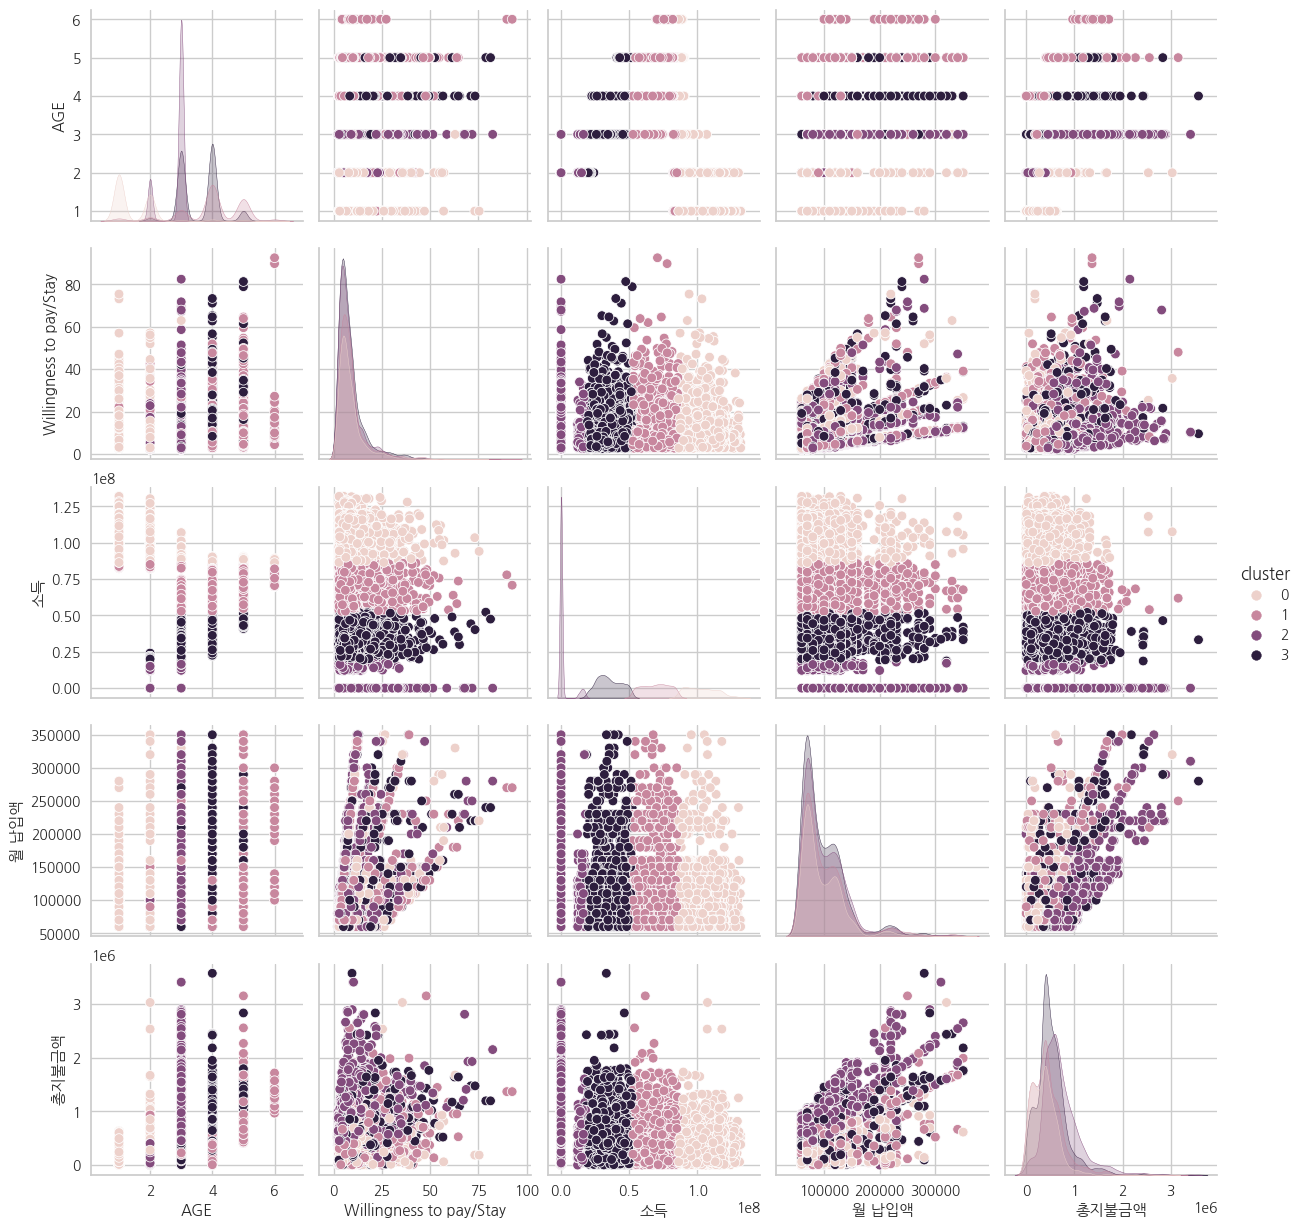

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df, hue='cluster')
plt.show()


In [ ]:
categorical_cols = ['고용상태', '상품타입', '교육수준', '타 상품 보유 현황', '자동차']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='cluster')
    plt.show()


In [ ]:
############################################################################################################################################################################################################################

In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)

# 별 차이가 없음...

cluster
0    5.542632
3    5.255180
1    5.238745
2    5.113066
Name: 총지불/납입, dtype: float64


In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)

# 별 차이가 없음...

cluster
1    5.531432
0    5.474887
2    5.334375
3    5.176282
Name: 총지불/납입, dtype: float64


In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)

# 별 차이가 없음...

cluster
1    5.531432
2    5.474887
3    5.334375
0    5.176282
Name: 총지불/납입, dtype: float64


In [ ]:
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['자동차'].value_counts())
print(cluster_2['지역'].value_counts())
print(cluster_2['상품타입'].value_counts())
print(cluster_2['AGE'].value_counts())

# 일반세단, 도시근교, 기본, 40대에서 낮은 총 지불 / 납입

일반세단    273
SUV      96
컴팩트카     95
고급차      27
스포츠카     24
Name: 자동차, dtype: int64
도시근교    515
Name: 지역, dtype: int64
기본    330
중급    141
고급     44
Name: 상품타입, dtype: int64
3    404
4     76
5     28
6      5
2      2
Name: AGE, dtype: int64


In [ ]:
cluster_3 = df[df['cluster'] == 3]
print(cluster_3['자동차'].value_counts())
print(cluster_3['지역'].value_counts())
print(cluster_3['상품타입'].value_counts())
print(cluster_3['AGE'].value_counts())

# 일반세단, 시골, 기본, 40대에서 높은 총 지불 / 납입

일반세단    1483
컴팩트카     593
SUV      501
스포츠카     165
고급차       72
Name: 자동차, dtype: int64
시골    2344
도심     470
Name: 지역, dtype: int64
기본    1730
중급     856
고급     228
Name: 상품타입, dtype: int64
3    1031
1     914
4     553
2     289
5      27
Name: AGE, dtype: int64


In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['자동차', '지역', '상품타입', 'AGE', '총지불/납입']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=4, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 1, 2, 3])

df['cluster'] = clusters
print(df.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2431, ncost: 36317.52982553001
Run: 1, iteration: 2/100, moves: 1066, ncost: 35368.766731631935
Run: 1, iteration: 3/100, moves: 304, ncost: 35316.38398503396
Run: 1, iteration: 4/100, moves: 58, ncost: 35314.072623497326
Run: 1, iteration: 5/100, moves: 20, ncost: 35313.63744697657
Run: 1, iteration: 6/100, moves: 14, ncost: 35313.38582487635
Run: 1, iteration: 7/100, moves: 4, ncost: 35313.36941347653
Run: 1, iteration: 8/100, moves: 0, ncost: 35313.36941347653
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1845, ncost: 36179.17666080756
Run: 2, iteration: 2/100, moves: 532, ncost: 35867.363278508
Run: 2, iteration: 3/100, moves: 479, ncost: 35522.24335154453
Run: 2, iteration: 4/100, moves: 397, ncost: 35349.36046145344
Run: 2, iter

In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)

cluster
0    12.113666
2     8.049391
3     5.430557
1     1.751371
Name: 총지불/납입, dtype: float64


In [ ]:
# 납입액에 비해 보험금이 높은 집단 2857명
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['자동차'].value_counts())
print(cluster_1['지역'].value_counts())
print(cluster_1['상품타입'].value_counts())
print(cluster_1['AGE'].value_counts())

KeyError: ignored

In [ ]:
# 납입액에 비해 보험금이 높은 집단 #2384
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['자동차'].value_counts())
print(cluster_2['지역'].value_counts())
print(cluster_2['상품타입'].value_counts())
print(cluster_2['AGE'].value_counts())

일반세단    1147
컴팩트카     559
SUV      467
스포츠카     111
고급차      100
Name: 자동차, dtype: int64
도시근교    2384
Name: 지역, dtype: int64
기본    1421
중급     721
고급     242
Name: 상품타입, dtype: int64
3    1514
4     413
5     242
2     150
1      49
6      16
Name: AGE, dtype: int64


In [ ]:
# 납입액에 비해 보험금이 높은 집단 # 6287
cluster_3 = df[df['cluster'] == 3]
print(cluster_3['자동차'].value_counts())
print(cluster_3['지역'].value_counts())
print(cluster_3['상품타입'].value_counts())
print(cluster_3['AGE'].value_counts())

일반세단    3171
SUV     1272
컴팩트카    1237
스포츠카     352
고급차      255
Name: 자동차, dtype: int64
도시근교    4673
도심      1614
Name: 지역, dtype: int64
기본    3797
중급    1929
고급     561
Name: 상품타입, dtype: int64
4    2082
3    1826
2    1097
5     760
1     491
6      31
Name: AGE, dtype: int64


In [ ]:
# 납입액에 비해 보험금이 높은 집단 # 515
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['자동차'].value_counts())
print(cluster_0['지역'].value_counts())
print(cluster_0['상품타입'].value_counts())
print(cluster_0['AGE'].value_counts())

일반세단    273
SUV      96
컴팩트카     95
고급차      27
스포츠카     24
Name: 자동차, dtype: int64
도시근교    515
Name: 지역, dtype: int64
기본    330
중급    141
고급     44
Name: 상품타입, dtype: int64
3    404
4     76
5     28
6      5
2      2
Name: AGE, dtype: int64


In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['자동차', '지역', '상품타입', 'AGE', '총지불/납입']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=3, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 1, 2, 3])

df['cluster'] = clusters
print(df.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1566, ncost: 52074.204603524544
Run: 1, iteration: 2/100, moves: 2200, ncost: 46507.229619565485
Run: 1, iteration: 3/100, moves: 2470, ncost: 41211.19098759363
Run: 1, iteration: 4/100, moves: 592, ncost: 40815.85889357078
Run: 1, iteration: 5/100, moves: 127, ncost: 40799.53864758676
Run: 1, iteration: 6/100, moves: 26, ncost: 40798.82136651591
Run: 1, iteration: 7/100, moves: 1, ncost: 40798.819604853095
Run: 1, iteration: 8/100, moves: 0, ncost: 40798.819604853095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2364, ncost: 41141.274268870075
Run: 2, iteration: 2/100, moves: 545, ncost: 40816.374641513816
Run: 2, iteration: 3/100, moves: 129, ncost: 40799.59549320209
Run: 2, iteration: 4/100, moves: 27, ncost: 40798.82136651596
Run:

In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)


cluster
2    9.046278
0    5.529679
1    1.778926
Name: 총지불/납입, dtype: float64


In [ ]:
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['자동차', '지역', '상품타입', 'AGE', '총지불/납입', '성별', 'Willingness to pay/Stay']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=4, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 1, 2, 3, 5])

df['cluster'] = clusters
print(df.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2190, ncost: 254937.6273367416
Run: 1, iteration: 2/100, moves: 1149, ncost: 247631.7799738909
Run: 1, iteration: 3/100, moves: 511, ncost: 244806.1315982073
Run: 1, iteration: 4/100, moves: 240, ncost: 243486.0728864957
Run: 1, iteration: 5/100, moves: 146, ncost: 242929.08543869513
Run: 1, iteration: 6/100, moves: 120, ncost: 242695.11067393236
Run: 1, iteration: 7/100, moves: 69, ncost: 242641.08394469833
Run: 1, iteration: 8/100, moves: 48, ncost: 242590.87844992947
Run: 1, iteration: 9/100, moves: 39, ncost: 242568.2447207689
Run: 1, iteration: 10/100, moves: 8, ncost: 242567.92527249135
Run: 1, iteration: 11/100, moves: 2, ncost: 242567.917645231
Run: 1, iteration: 12/100, moves: 0, ncost: 242567.917645231
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, i

In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)


cluster
2    5.541747
0    5.255180
3    5.238745
1    5.114776
Name: 총지불/납입, dtype: float64


In [ ]:
cluster_3 = df[df['cluster'] == 3]
print(cluster_3['자동차'].value_counts())
print(cluster_3['지역'].value_counts())
print(cluster_3['상품타입'].value_counts())
print(cluster_3['AGE'].value_counts())

SUV     113
고급차      48
스포츠카     42
일반세단     38
컴팩트카     20
Name: 자동차, dtype: int64
도시근교    172
도심       45
시골       44
Name: 지역, dtype: int64
기본    113
중급     91
고급     57
Name: 상품타입, dtype: int64
4    86
3    66
5    58
1    25
2    24
6     2
Name: AGE, dtype: int64


In [ ]:
# KPrototypes 클러스터링

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

selected_data = df[['자동차', '지역', '상품타입', 'AGE', '총지불/납입', '성별', 'Willingness to pay/Stay']].values

# K-프로토타입 클러스터링
kproto = KPrototypes(n_clusters=4, verbose=2)
clusters = kproto.fit_predict(selected_data, categorical=[0, 1, 2, 3, 5])

df['cluster'] = clusters
print(df.head())

In [ ]:
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,총지불/납입,cluster
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소,7.887500,2
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,0.675000,2
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중,6.033333,2
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,11.490909,1
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중,7.891667,1


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

selected_data = df[['총지불/납입']]

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(selected_data)

# 클러스터 레이블을 데이터 프레임에 추가
df['cluster'] = clusters

In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)

cluster
3    12.178057
2     8.094763
0     5.440386
1     1.756423
Name: 총지불/납입, dtype: float64


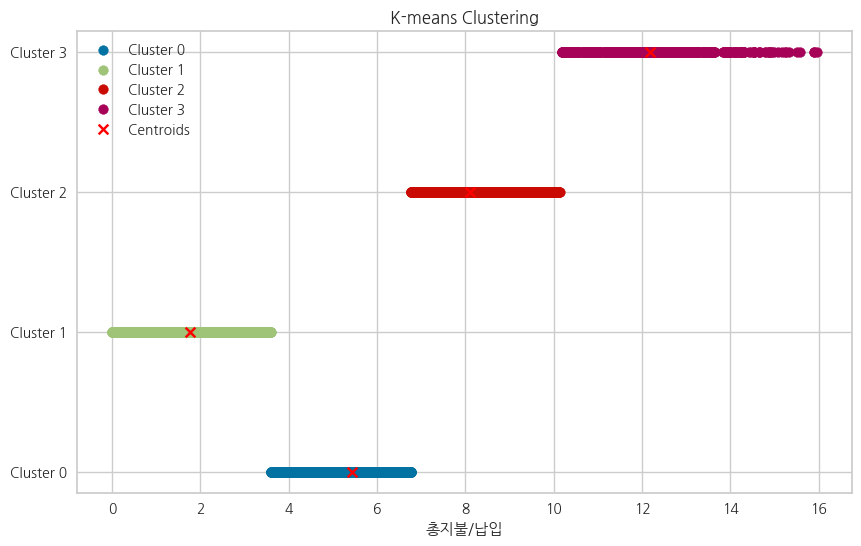

In [ ]:
import matplotlib.pyplot as plt

# 클러스터 중심을 가져옵니다.
centroids = kmeans.cluster_centers_

# 데이터 프레임에 클러스터 레이블을 사용하여 각 클러스터를 그립니다.
plt.figure(figsize=(10, 6))
for i in range(4):
    cluster_data = selected_data[df['cluster'] == i]
    plt.scatter(cluster_data['총지불/납입'], [i]*len(cluster_data), label=f'Cluster {i}')

# 클러스터 중심
plt.scatter(centroids, range(4), color='red', marker='x', label='Centroids')

plt.xlabel('총지불/납입')
plt.yticks(range(4), [f'Cluster {i}' for i in range(4)])
plt.legend()
plt.title('K-means Clustering')
plt.show()


In [ ]:
# 499
3    12.178057

3번 군집이

cluster_3 = df[df['cluster'] == 3]
print(cluster_3['자동차'].value_counts())
print(cluster_3['지역'].value_counts())
print(cluster_3['상품타입'].value_counts())
print(cluster_3['AGE'].value_counts())

일반세단    257
SUV      96
컴팩트카     95
고급차      27
스포츠카     24
Name: 자동차, dtype: int64
도시근교    499
Name: 지역, dtype: int64
기본    319
중급    138
고급     42
Name: 상품타입, dtype: int64
3    395
4     69
5     28
6      5
2      2
Name: AGE, dtype: int64


In [ ]:
# 2358
2     8.094763

cluster_2 = df[df['cluster'] == 2]
print(cluster_2['자동차'].value_counts())
print(cluster_2['지역'].value_counts())
print(cluster_2['상품타입'].value_counts())
print(cluster_2['AGE'].value_counts())

일반세단    1132
컴팩트카     551
SUV      465
스포츠카     112
고급차       98
Name: 자동차, dtype: int64
도시근교    2358
Name: 지역, dtype: int64
기본    1398
중급     716
고급     244
Name: 상품타입, dtype: int64
3    1438
4     467
5     242
2     147
1      48
6      16
Name: AGE, dtype: int64


In [ ]:
# 6318

0     5.440386

cluster_0 = df[df['cluster'] == 0]
print(cluster_0['자동차'].value_counts())
print(cluster_0['지역'].value_counts())
print(cluster_0['상품타입'].value_counts())
print(cluster_0['AGE'].value_counts())

일반세단    3189
SUV     1277
컴팩트카    1247
스포츠카     349
고급차      256
Name: 자동차, dtype: int64
도시근교    4715
도심      1603
Name: 지역, dtype: int64
기본    3836
중급    1922
고급     560
Name: 상품타입, dtype: int64
4    1996
3    1939
2    1100
5     760
1     492
6      31
Name: AGE, dtype: int64


In [ ]:
# 2825
1     1.756423
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['자동차'].value_counts())
print(cluster_1['지역'].value_counts())
print(cluster_1['상품타입'].value_counts())
print(cluster_1['AGE'].value_counts())

일반세단    1496
컴팩트카     591
SUV      498
스포츠카     167
고급차       73
Name: 자동차, dtype: int64
시골    2344
도심     481
Name: 지역, dtype: int64
기본    1725
중급     871
고급     229
Name: 상품타입, dtype: int64
3    1003
1     914
4     592
2     289
5      27
Name: AGE, dtype: int64


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans


# '총지불/납입' 특성만 선택
selected_data = df[['총지불/납입']]

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(selected_data)

# 클러스터 레이블을 데이터 프레임에 추가
df['cluster'] = clusters

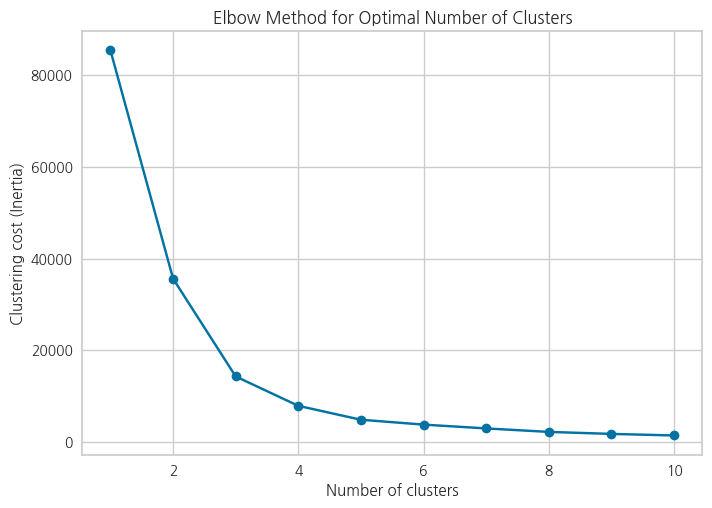

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 선택된 데이터
selected_data = df[['총지불/납입']]

# 클러스터 범위 설정 (1부터 10까지)
cluster_range = range(1, 11)

inertia = []

# 각 클러스터 수에 대해 K-means 클러스터링 수행
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(selected_data)
    inertia.append(kmeans.inertia_)

# 클러스터링 비용 그래프 그리기
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Clustering cost (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [ ]:
print('d')

d


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans


selected_data = df[['총지불/납입']]

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(selected_data)

# 클러스터 레이블을 데이터 프레임에 추가
df['cluster'] = clusters

In [ ]:
cluster_means = df.groupby('cluster')['총지불/납입'].mean().sort_values(ascending=False)

print(cluster_means)

cluster
2    9.076115
0    5.544453
1    1.788999
Name: 총지불/납입, dtype: float64


In [ ]:
print('hi')

hi


In [ ]:
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [ ]:
filtered_df = df[(df['AGE'] == 1) | (df['AGE'] == 2)]
mean_income = filtered_df['소득'].mean()
print(mean_income)

81008410.22727273
